# Extracting second convolutional layer in DeepSEA

In [37]:
import kipoi
import numpy as np
import torch


In [2]:
deep_sea = kipoi.get_model("DeepSEA/predict")

Using downloaded and verified file: /home/ubuntu/.kipoi/models/DeepSEA/predict/downloaded/model_files/weights/89e640bf6bdbe1ff165f484d9796efc7


In [3]:
deep_sea.model

Sequential(
  (0): ReCodeAlphabet()
  (1): ConcatenateRC()
  (2): Sequential(
    (0): Conv2d(4, 320, kernel_size=(1, 8), stride=(1, 1))
    (1): Threshold(threshold=0, value=1e-06)
    (2): MaxPool2d(kernel_size=(1, 4), stride=(1, 4), padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.2, inplace=False)
    (4): Conv2d(320, 480, kernel_size=(1, 8), stride=(1, 1))
    (5): Threshold(threshold=0, value=1e-06)
    (6): MaxPool2d(kernel_size=(1, 4), stride=(1, 4), padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.2, inplace=False)
    (8): Conv2d(480, 960, kernel_size=(1, 8), stride=(1, 1))
    (9): Threshold(threshold=0, value=1e-06)
    (10): Dropout(p=0.5, inplace=False)
    (11): Lambda()
    (12): Sequential(
      (0): Lambda()
      (1): Linear(in_features=50880, out_features=925, bias=True)
    )
    (13): Threshold(threshold=0, value=1e-06)
    (14): Sequential(
      (0): Lambda()
      (1): Linear(in_features=925, out_features=919, bias=True)
    )
    (15):

In [4]:
torch.save(deep_sea.model[2][4].weight, "out/conv_layer2.pt")
np.save("out/conv_layer2.npy", deep_sea.model[2][4].weight.detach().numpy())

# Looking at second layer filters 

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from kipoi_veff.utils.plot import seqlogo_heatmap
import seaborn as sns
from os.path import join as oj

In [ ]:
def swapPositions(pwms):
    x = pwms[:, 1:2, :].copy()
    y = pwms[:, 2:3, :].copy()
    pwms[:, 1:2, :] = y
    pwms[:, 2:3, :] = x
    return pwms

In [42]:
result_dir = 'out/'
pwms = swapPositions(np.load(oj(result_dir, "PWMs_max_active_per_seq.npy")))
first = swapPositions(np.load(oj(result_dir + "PWMs_direct.npy")))
second = np.load(oj(result_dir + "conv_layer2.npy")).squeeze()
print(first.shape)
print(second.shape)

(320, 4, 8)
(480, 320, 8)


<AxesSubplot:>

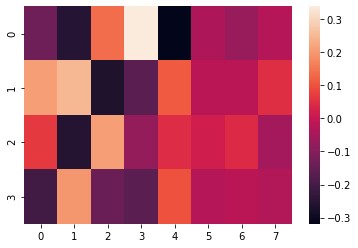

In [43]:
sns.heatmap(first[0, :, :])

<AxesSubplot:>

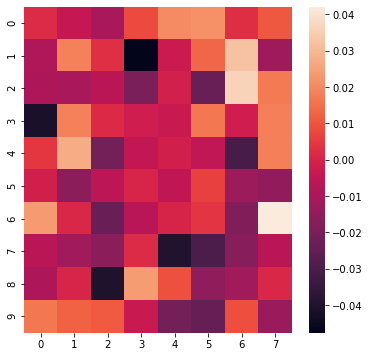

In [44]:
plt.figure(figsize=(6, 6))
sns.heatmap(second[0:10, 0, :])

<AxesSubplot:>

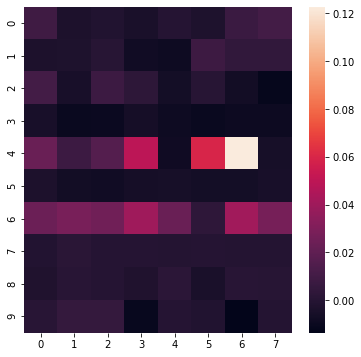

In [13]:
plt.figure(figsize=(6, 6))
sns.heatmap(second[0:10, 233, :])

In [45]:
print(np.max(second[:, 0, :]), np.min(second[:, 0, :]))
print(np.max(second[:, 233, :]), np.min(second[:, 233, :]))
print(np.std(second[:, 0, :]), np.std(second[:, 233, :]))
print(np.quantile(second[:, 0, :], 0.999), np.quantile(second[:, 233, :], 0.999))

0.1088262 -0.09571945
0.15149525 -0.041892238
0.019057326 0.012686815
0.08684531336277748 0.1248928159400822


<AxesSubplot:>

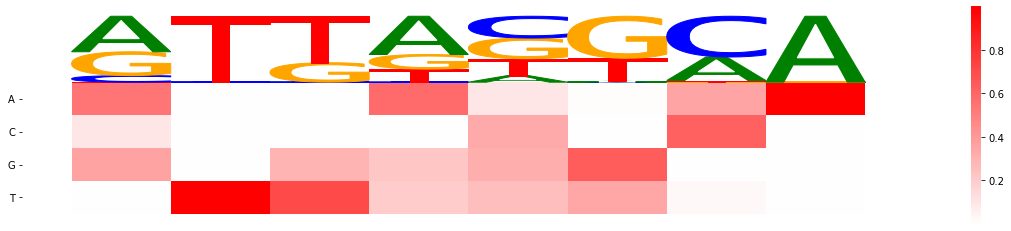

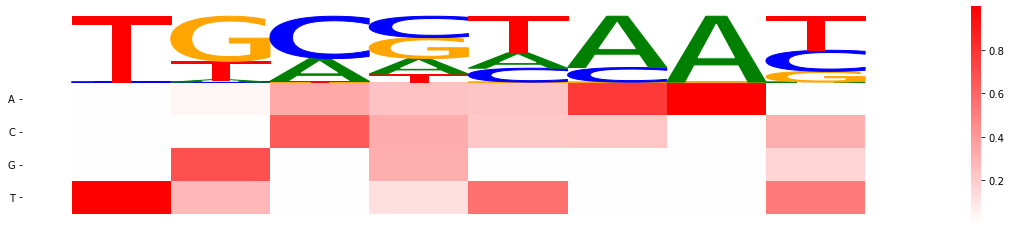

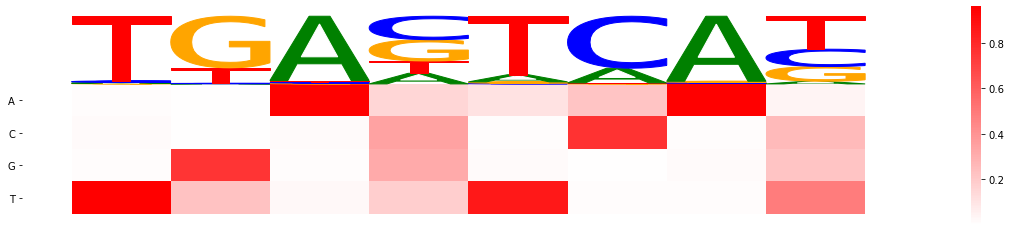

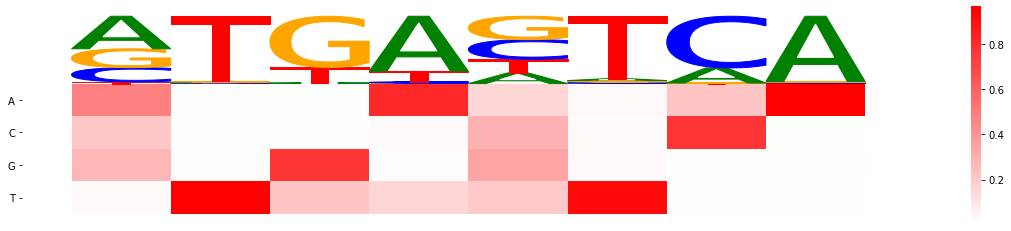

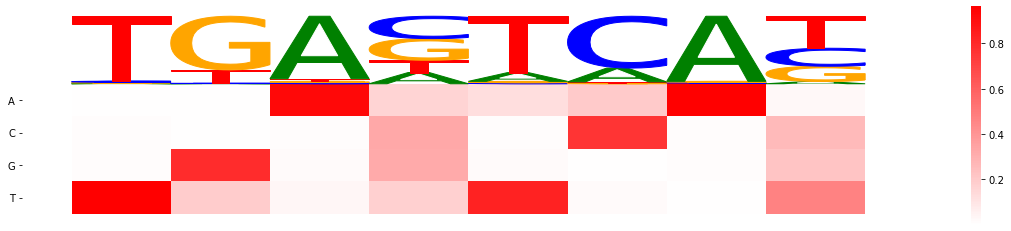

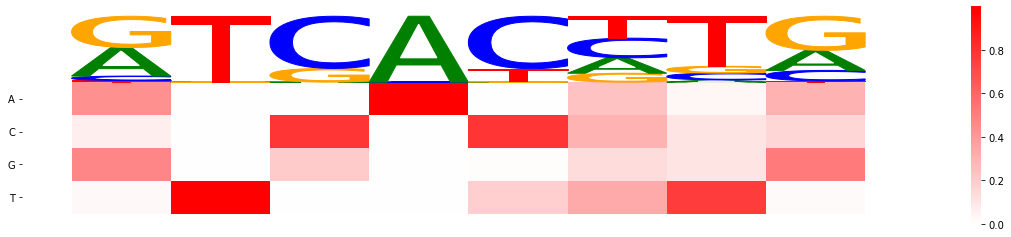

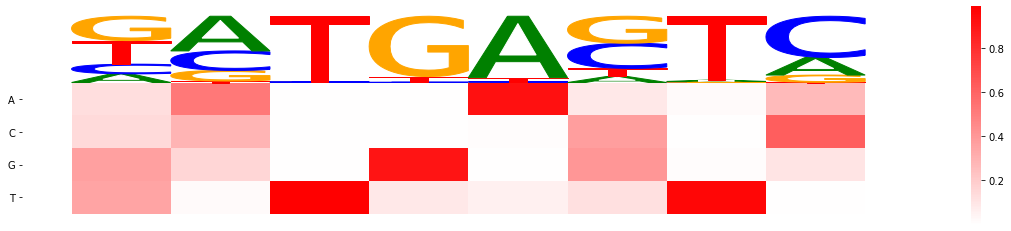

In [52]:
seqlogo_heatmap(pwms[115, :, :].T, 
                pwms[115, :, :])
seqlogo_heatmap(pwms[210, :, :].T, 
                pwms[210, :, :])
seqlogo_heatmap(pwms[303, :, :].T, 
                pwms[303, :, :])
seqlogo_heatmap(pwms[233, :, :].T, 
                pwms[233, :, :])
seqlogo_heatmap(pwms[265, :, :].T, 
                pwms[265, :, :])
seqlogo_heatmap(pwms[318, :, :].T, 
                pwms[318, :, :])
seqlogo_heatmap(pwms[107, :, :].T, 
                pwms[107, :, :])

0.016783156897872666

<AxesSubplot:>

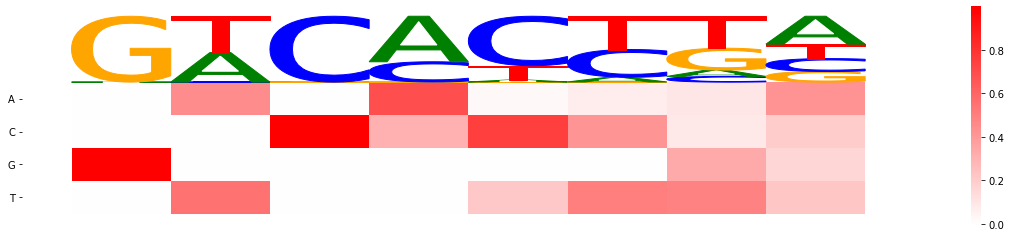

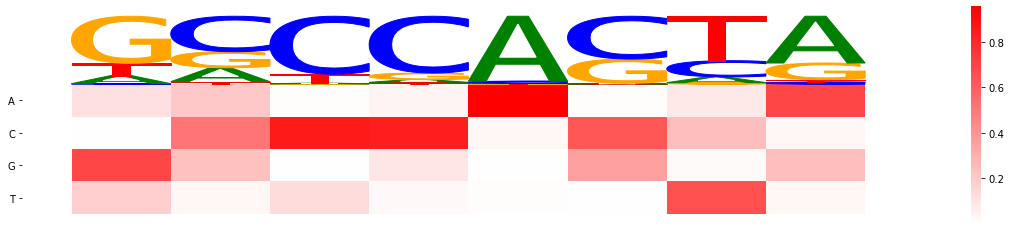

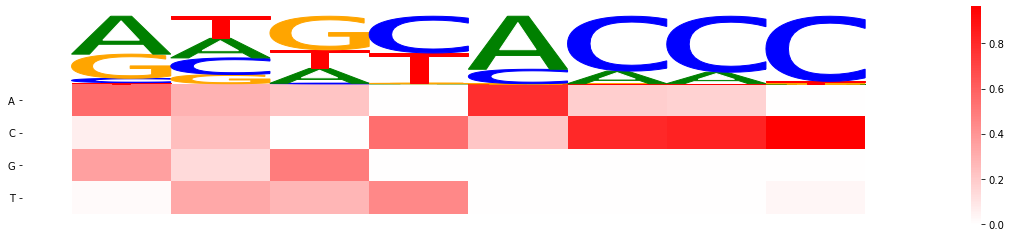

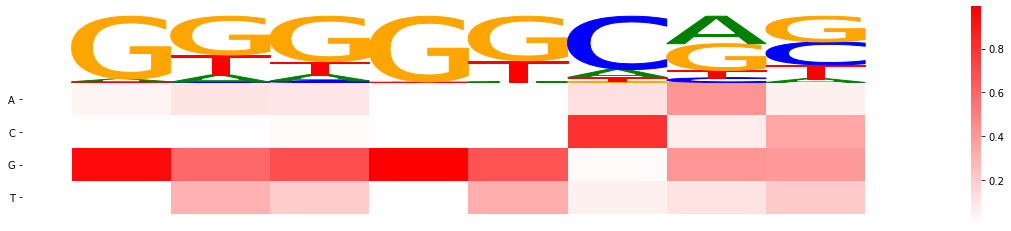

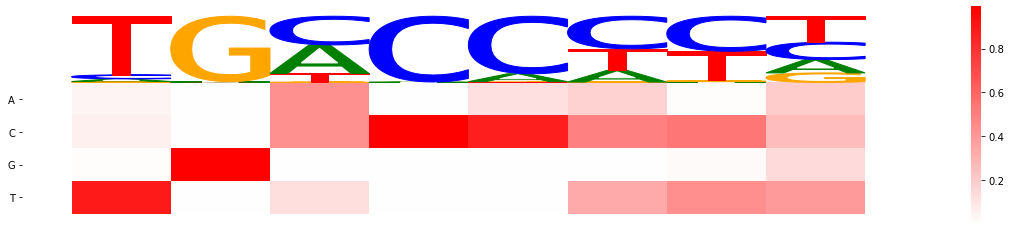

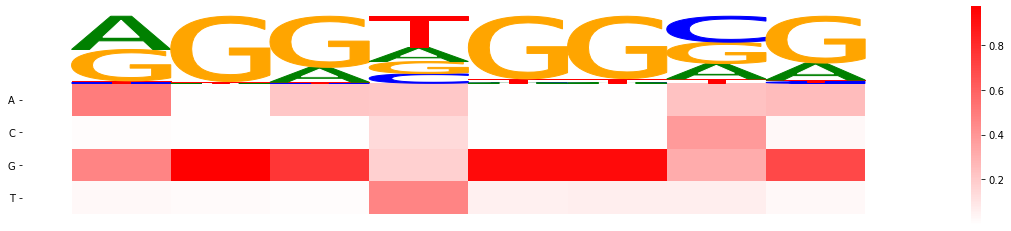

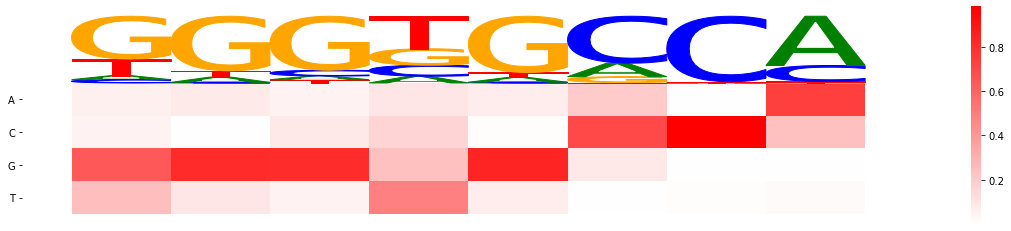

In [53]:
seqlogo_heatmap(pwms[81, :, :].T, 
                pwms[81, :, :])
seqlogo_heatmap(pwms[68, :, :].T, 
                pwms[68, :, :])
seqlogo_heatmap(pwms[87, :, :].T, 
                pwms[87, :, :])
seqlogo_heatmap(pwms[78, :, :].T, 
                pwms[78, :, :])
seqlogo_heatmap(pwms[255, :, :].T, 
                pwms[255, :, :])
seqlogo_heatmap(pwms[100, :, :].T, 
                pwms[100, :, :])
seqlogo_heatmap(pwms[168, :, :].T, 
                pwms[168, :, :])

<AxesSubplot:>

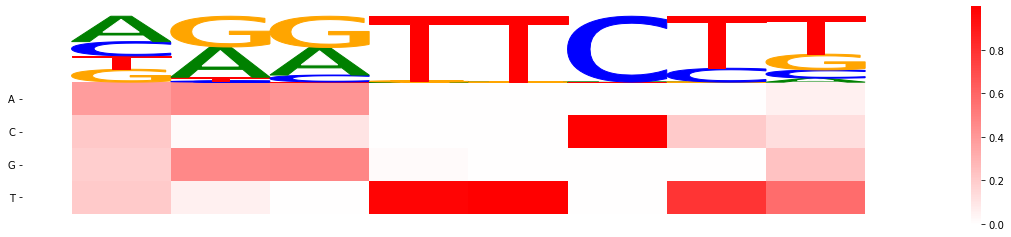

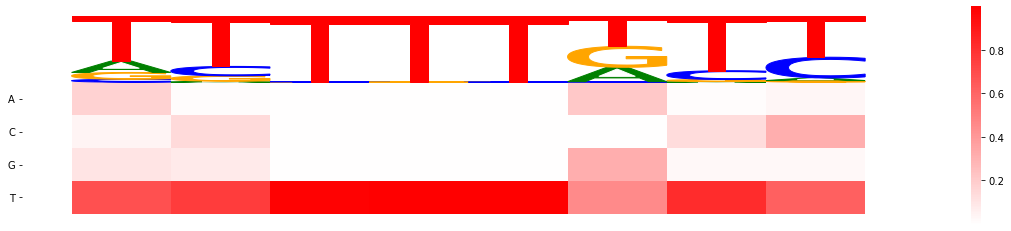

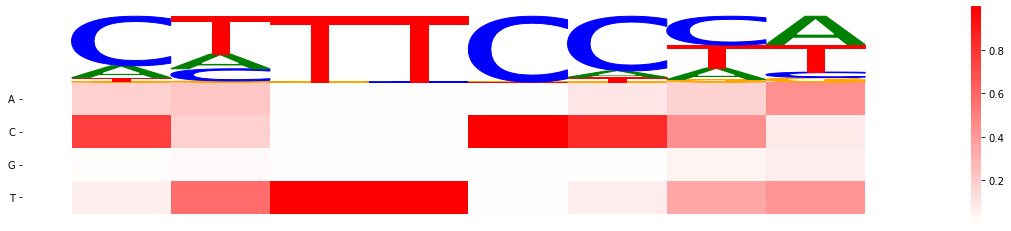

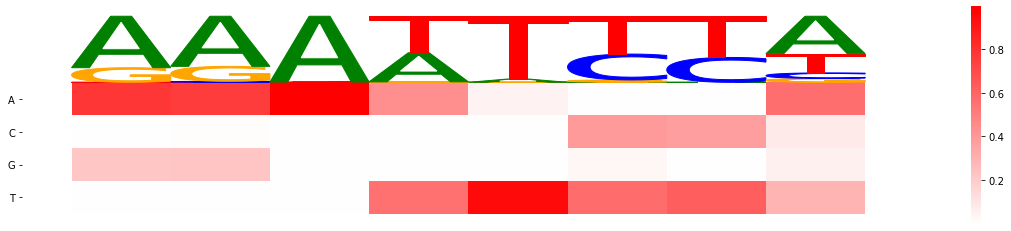

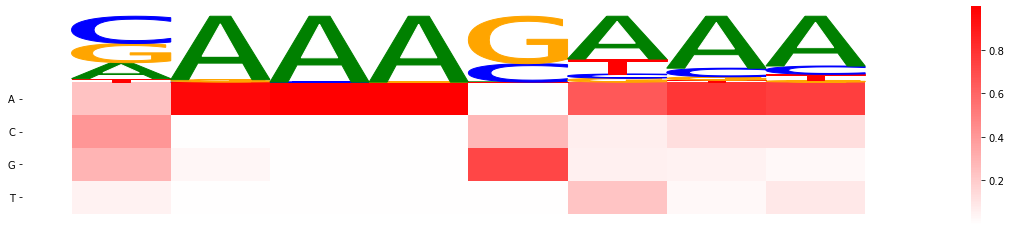

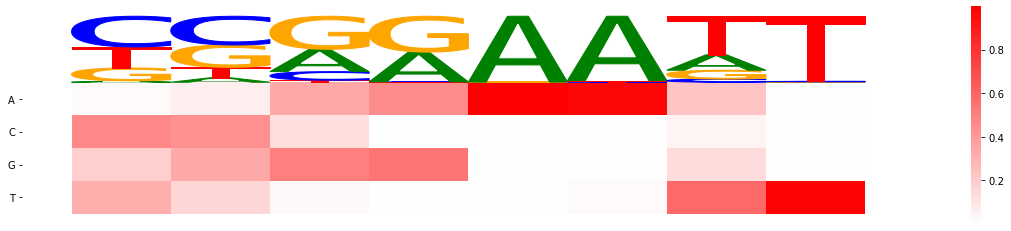

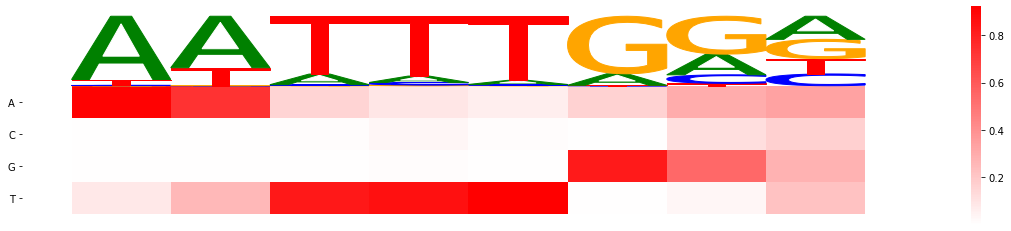

In [54]:
seqlogo_heatmap(pwms[117, :, :].T, 
                pwms[117, :, :])
seqlogo_heatmap(pwms[169, :, :].T, 
                pwms[169, :, :])
seqlogo_heatmap(pwms[82, :, :].T, 
                pwms[82, :, :])
seqlogo_heatmap(pwms[304, :, :].T, 
                pwms[304, :, :])
seqlogo_heatmap(pwms[19, :, :].T, 
                pwms[19, :, :])
seqlogo_heatmap(pwms[121, :, :].T, 
                pwms[121, :, :])
seqlogo_heatmap(pwms[254, :, :].T, 
                pwms[254, :, :])